DATA620: Web Analytics Week 7 Omar Pineda Fall 2019

1. Identify a large 2-mode network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?


To start, we import our libraries and load our dataset. We chose to analyze the Moreno Valley 2-mode dataset on crime where there are two types of nodes: individuals involved in crimes and the crime events themselves. We first saved the edges file into a .csv file so that we could load it into a dataframe and add more information to the dataset.

Dataset citation:
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={http://networkrepository.com},
      year={2015}

In [15]:
#Load Libraries
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
#Load dataset
moreno = pd.read_csv('ia-crime-moreno.csv')
moreno.head()

people = pd.DataFrame(moreno.person.unique(), columns=['person'])
people['node_type'] = 'person'
crimes = pd.DataFrame(moreno.crime.unique(), columns=['crime'])
crimes['node_type'] = 'crime'


# Build the graph from the node sets and edges
# set bipartite attribute to ensure weighted projection will work
p_nodes = list(people['person'])
c_nodes = list(crimes['crime'])
edges = [tuple(i) for i in moreno.values]
#edge_bunch = [tuple(i) for i in df_m.values]

mor = nx.Graph()
mor.add_nodes_from(p_nodes,node_type='person', bipartite=0)
mor.add_nodes_from(c_nodes,node_type='crime', bipartite=1)
mor.add_edges_from(edges)



color_map = []
for node in mor:
    if node.node_type ='person':
        color_map.append('blue')
    else: color_map.append('green') 
        
plt.figure(figsize=(12, 12))
nx.draw(mor, with_labels=True, font_weight='bold', node_color)

#moreno = nx.Graph()
#edges = nx.read_edgelist('ia-crime-moreno.edges')
#moreno.add_edges_from(edges.edges())

#pos = nx.spring_layout(dav)
#plt.figure(figsize=(12, 12))
#nx.draw(moreno, with_labels=True, font_weight='bold', node_color = 'blue')
#print(nx.info(moreno))


#dav = nx.davis_southern_women_graph()
#women, events = bipartite.sets(dav)
#print women, events

SyntaxError: invalid syntax (<ipython-input-38-99fc23735ad2>, line 27)

Next, we visualize the network. Events are grey and the women are pink.

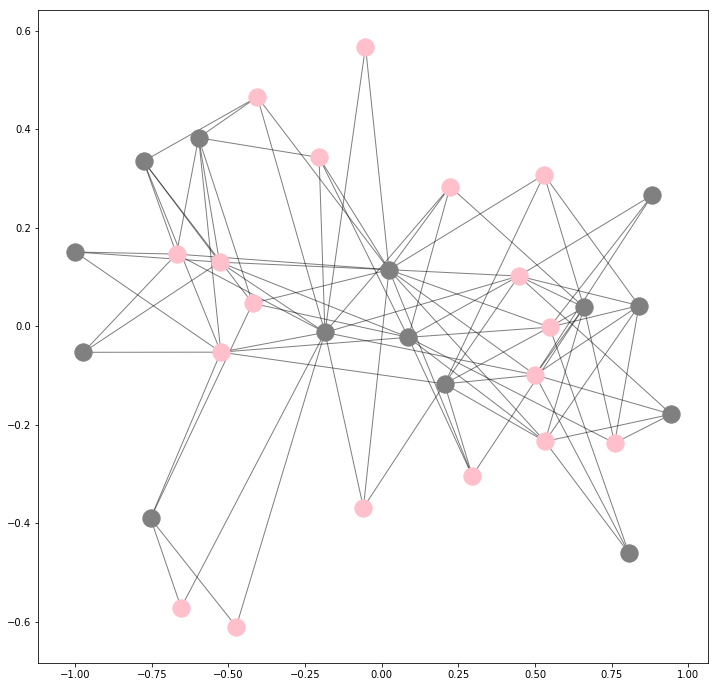

In [38]:
pos = nx.spring_layout(dav)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(dav, pos, nodelist=women, node_color = 'pink')
nx.draw_networkx_nodes(dav, pos, nodelist=events, node_color = 'grey')
nx.draw_networkx_edges(dav,pos,with_labels=True,width=1.0,alpha=0.5)

We then look at centrality measures for the women and the events.

Some women have degree of 17, so they are connected to all of the other women in the network by having gone to an event with them. We can also see the number of events that each woman has gone to.

In [51]:
wom = bipartite.projected_graph(dav, women)
womFriends = pd.DataFrame(list(wom.degree()), columns = ["Person", "Friends"])

womEve = bipartite.weighted_projected_graph(dav, women)
womEvents = pd.DataFrame(list(womEve.degree(womEve, weight='weight')),columns=["Person","Event Visits"])

master = pd.merge(womFriends, womEvents, on = 'Person')
master.sort_values(by=['Friends', 'Event Visits'], ascending = False)

,Person,Friends,Event Visits
0,Theresa Anderson,17,57
12,Evelyn Jefferson,17,50
5,Sylvia Avondale,17,46
4,Nora Fayette,17,43
14,Ruth DeSand,17,40
6,Verne Sanderson,17,38
1,Helen Lloyd,17,34
3,Katherina Rogers,16,37
16,Myra Liddel,16,33
17,Pearl Oglethorpe,16,31


Additionally, we can see the degree centrality for the events themselves. The "most popular" events are frequented by 13 of the 18 women.

In [54]:
eve = bipartite.projected_graph(dav, events)
pd.DataFrame(list(eve.degree()), columns = ["Event", "Women"])

,Event,Women
0,E11,8
1,E10,8
2,E13,8
3,E12,8
4,E14,8
5,E9,13
6,E8,13
7,E5,8
8,E4,8
9,E7,13


It seems that Theresa Anderson frequents events the most and is connected to all of her peers by attending 8 out of 14 unique events. Her ego networks appear in the following way.

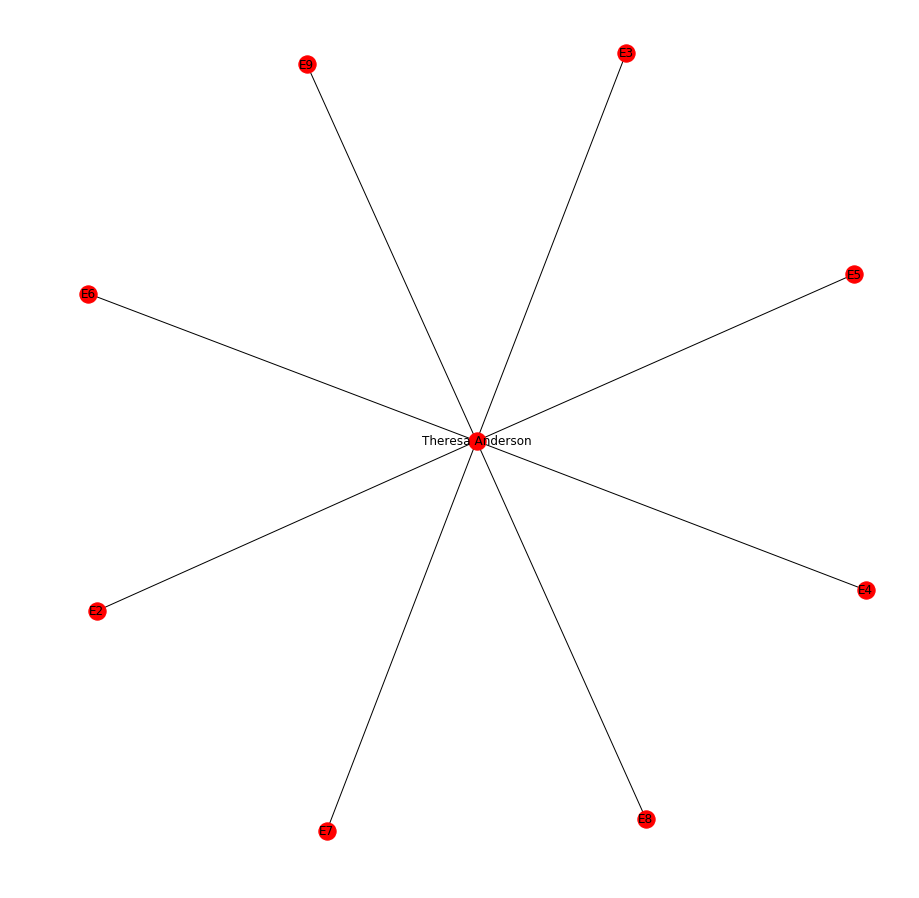

In [56]:
theresa1 = nx.ego_graph(dav, 'Theresa Anderson', radius = 1)
plt.figure(figsize=(12, 12))
nx.draw(theresa1, with_labels = True)

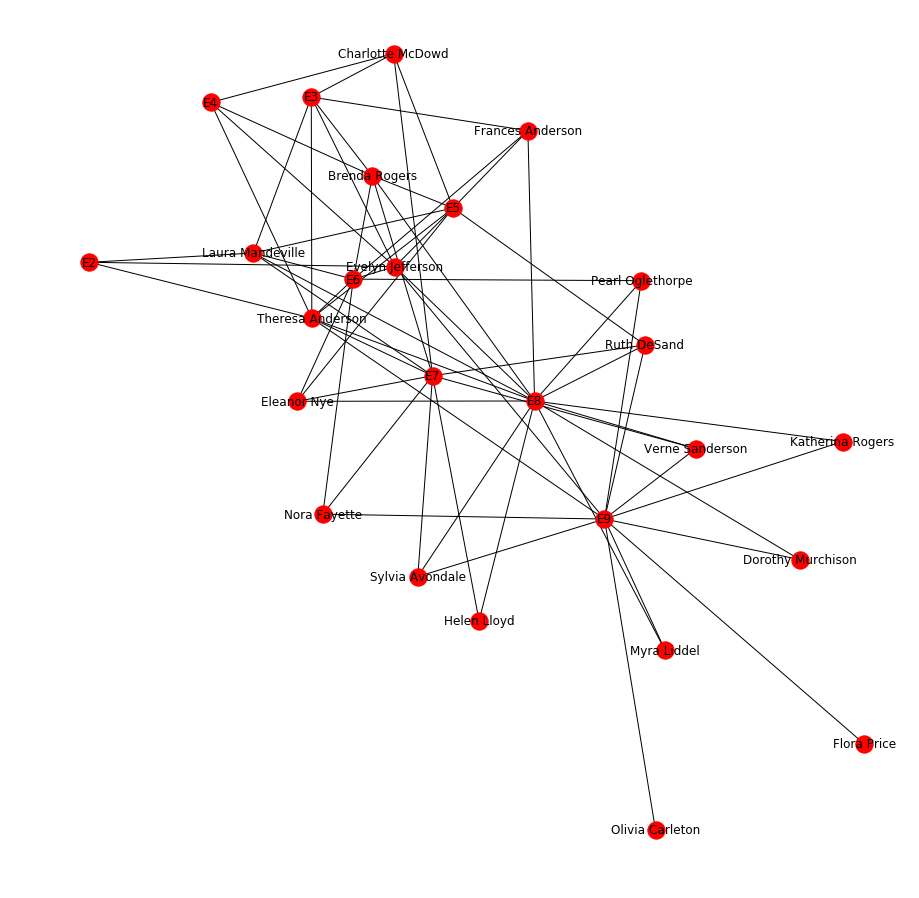

In [57]:
theresa2 = nx.ego_graph(dav, 'Theresa Anderson', radius = 2)
plt.figure(figsize=(12, 12))
nx.draw(theresa2, with_labels = True)

Conclusion

This network is centralized and closed. It seems that the core of this network is composed of a couple of women who frequent different events often and are thus connected to all of the women in the network. These women can be influencers or have information travel through them and disperse throughout the network. Theresa Anderson ties for the most connections with other women, and she has the most total event visits across 8 out of 14 events. The maximum number of women who frequent an event is 13, so all 18 women are never at the same event.

SyntaxError: invalid syntax (<ipython-input-2-a8f826559415>, line 1)